In [1]:
from six import b
import tensorflow as tf
from datasetV2 import *
from modelv2 import UNET
from model3 import simple_unet_model_with_jacard
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# path

train_path =  'train_dataset.csv' 
val_path =   'val_dataset.csv' 

SEED = 42
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 144
AUTOTUNE = tf.data.experimental.AUTOTUNE


physical_devices = tf.config.experimental.list_physical_devices('GPU')
# assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
# config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(physical_devices)

# set train and val dataset
BATCH_SIZE = 8 
BUFFER_SIZE = 1000


2021-10-26 21:03:54.906155: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2021-10-26 21:03:57.477043: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-26 21:03:57.478443: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-26 21:03:57.523768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 21:03:57.524207: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-10-26 21:03:57.524234: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-10-26 21:03:57.526668: I tensorflow/stream_executor/platform/def

In [2]:
# load train dataset
train_images, train_masks = load_data(train_path)
train_dataset = tf_dataset(train_images, train_masks,batch_size=BATCH_SIZE, buffer_size=BUFFER_SIZE)
# load val dataset
val_images, val_masks = load_data(val_path)
val_dataset = tf_dataset(val_images, val_masks, batch_size=BATCH_SIZE, buffer_size=BUFFER_SIZE)

# model = UNET(n_classes=1, IMG_HEIGHT=224, IMG_WIDTH=144, IMG_CHANNELS=3)
# model = UNET(input_size=(224, 144, 3), n_filters=2, n_classes=1)
# model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
# model.compile(optimizer=tf.keras.optimizers.Adam(), 
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# Model V3
model = simple_unet_model_with_jacard(IMAGE_HEIGHT, IMAGE_WIDTH, 3)
model.summary()


224 144


2021-10-26 21:03:57.624505: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


224 144


2021-10-26 21:03:57.625178: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-26 21:03:57.625425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 21:03:57.625702: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-10-26 21:03:57.625756: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-10-26 21:03:57.625814: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-10-26 21:03:57.625836: I tensorflow/stream_executor/platform/

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 144, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 144, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 224, 144, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 144, 16) 2320        dropout[0][0]                    
______________________________________________________________________________________________

In [3]:
TRAINSET_SIZE = len(train_images)
VALSET_SIZE = len(val_images)
print('Train size: ',TRAINSET_SIZE)
print('Val size: ',VALSET_SIZE)




EPOCHS = 20
STEPS_PER_EPOCH = TRAINSET_SIZE // BATCH_SIZE
VALIDATION_STEPS = VALSET_SIZE // BATCH_SIZE
with tf.device("/gpu:0"):
    history = model.fit(train_dataset, epochs=EPOCHS,batch_size=BATCH_SIZE,
                                steps_per_epoch=STEPS_PER_EPOCH,
                                validation_steps=VALIDATION_STEPS,
                                validation_data=val_dataset)




Train size:  1000
Val size:  100
Epoch 1/20


2021-10-26 21:03:59.854047: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-26 21:03:59.884363: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2799925000 Hz
2021-10-26 21:04:10.211935: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 960 of 1000
2021-10-26 21:04:10.617523: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.
2021-10-26 21:04:10.626484: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-10-26 21:04:11.481388: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-10-26 21:04:11.553567: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH t

125/125 [==============================] - 75s 120ms/step - loss: -0.0325 - jacard_coef: 0.0325 - val_loss: -1.5115e-04 - val_jacard_coef: 1.5115e-04
Epoch 2/20


2021-10-26 21:05:23.907746: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 791 of 1000


  1/125 [..............................] - ETA: 26:02 - loss: -1.5996e-04 - jacard_coef: 1.5996e-04

2021-10-26 21:05:26.390672: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 27s 113ms/step - loss: -1.6445e-04 - jacard_coef: 1.6445e-04 - val_loss: -1.4561e-04 - val_jacard_coef: 1.4561e-04
Epoch 3/20


2021-10-26 21:05:50.483439: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 703 of 1000


  2/125 [..............................] - ETA: 11s - loss: -1.6461e-04 - jacard_coef: 1.6461e-04  

2021-10-26 21:05:54.420103: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 28s 114ms/step - loss: -1.6974e-04 - jacard_coef: 1.6974e-04 - val_loss: -1.4336e-04 - val_jacard_coef: 1.4336e-04
Epoch 4/20


2021-10-26 21:06:18.662070: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 606 of 1000


  1/125 [..............................] - ETA: 32:29 - loss: -1.3936e-04 - jacard_coef: 1.3936e-04

2021-10-26 21:06:24.253034: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 30s 118ms/step - loss: -0.0043 - jacard_coef: 0.0043 - val_loss: -0.0259 - val_jacard_coef: 0.0259
Epoch 5/20


2021-10-26 21:06:48.983038: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 591 of 1000


  2/125 [..............................] - ETA: 12s - loss: -0.0230 - jacard_coef: 0.0230  

2021-10-26 21:06:55.240080: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 31s 118ms/step - loss: -0.0231 - jacard_coef: 0.0231 - val_loss: -0.0262 - val_jacard_coef: 0.0262
Epoch 6/20


2021-10-26 21:07:19.995546: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 567 of 1000


  1/125 [..............................] - ETA: 35:23 - loss: -0.0225 - jacard_coef: 0.0225

2021-10-26 21:07:27.000123: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 32s 118ms/step - loss: -0.0242 - jacard_coef: 0.0242 - val_loss: -0.0272 - val_jacard_coef: 0.0272
Epoch 7/20


2021-10-26 21:07:51.799590: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 545 of 1000


  1/125 [..............................] - ETA: 37:04 - loss: -0.0234 - jacard_coef: 0.0234

2021-10-26 21:07:59.606757: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 33s 120ms/step - loss: -0.0339 - jacard_coef: 0.0339 - val_loss: -0.1330 - val_jacard_coef: 0.1330
Epoch 8/20


2021-10-26 21:08:24.607192: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 518 of 1000


  1/125 [..............................] - ETA: 38:02 - loss: -0.1573 - jacard_coef: 0.1573

2021-10-26 21:08:32.893902: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 34s 122ms/step - loss: -0.1696 - jacard_coef: 0.1696 - val_loss: -0.1817 - val_jacard_coef: 0.1817
Epoch 9/20


2021-10-26 21:08:58.196964: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 470 of 1000
2021-10-26 21:09:08.206463: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 952 of 1000


  1/125 [..............................] - ETA: 43:25 - loss: -0.1929 - jacard_coef: 0.1929

2021-10-26 21:09:09.083361: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 36s 120ms/step - loss: -0.1979 - jacard_coef: 0.1979 - val_loss: -0.1859 - val_jacard_coef: 0.1859
Epoch 10/20


2021-10-26 21:09:34.153944: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 496 of 1000


  1/125 [..............................] - ETA: 40:13 - loss: -0.2248 - jacard_coef: 0.2248

2021-10-26 21:09:43.499363: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 35s 124ms/step - loss: -0.3878 - jacard_coef: 0.3878 - val_loss: -0.6149 - val_jacard_coef: 0.6149
Epoch 11/20


2021-10-26 21:10:09.006009: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 461 of 1000


  1/125 [..............................] - ETA: 41:14 - loss: -0.6321 - jacard_coef: 0.6321

2021-10-26 21:10:18.836371: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 35s 123ms/step - loss: -0.7343 - jacard_coef: 0.7343 - val_loss: -0.6891 - val_jacard_coef: 0.6891
Epoch 12/20


2021-10-26 21:10:44.261538: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 484 of 1000


  1/125 [..............................] - ETA: 40:27 - loss: -0.7173 - jacard_coef: 0.7173

2021-10-26 21:10:53.710315: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 36s 129ms/step - loss: -0.7674 - jacard_coef: 0.7674 - val_loss: -0.7324 - val_jacard_coef: 0.7324
Epoch 13/20


2021-10-26 21:11:19.895743: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 404 of 1000
2021-10-26 21:11:29.902584: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 926 of 1000


  1/125 [..............................] - ETA: 44:30 - loss: -0.8770 - jacard_coef: 0.8770

2021-10-26 21:11:31.318377: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 37s 128ms/step - loss: -0.7877 - jacard_coef: 0.7877 - val_loss: -0.6803 - val_jacard_coef: 0.6803
Epoch 14/20


2021-10-26 21:11:57.286254: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 409 of 1000
2021-10-26 21:12:07.266005: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 825 of 1000


  1/125 [..............................] - ETA: 49:10 - loss: -0.7835 - jacard_coef: 0.7835

2021-10-26 21:12:10.931419: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 39s 125ms/step - loss: -0.8081 - jacard_coef: 0.8081 - val_loss: -0.7241 - val_jacard_coef: 0.7241
Epoch 15/20


2021-10-26 21:12:36.592971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 465 of 1000
2021-10-26 21:12:46.591420: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 994 of 1000
2021-10-26 21:12:46.727708: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 37s 137ms/step - loss: -0.8063 - jacard_coef: 0.8063 - val_loss: -0.7613 - val_jacard_coef: 0.7613
Epoch 16/20


2021-10-26 21:13:13.899475: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 366 of 1000
2021-10-26 21:13:23.901950: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 856 of 1000


  1/125 [..............................] - ETA: 47:18 - loss: -0.7739 - jacard_coef: 0.7739

2021-10-26 21:13:26.673899: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 38s 125ms/step - loss: -0.8211 - jacard_coef: 0.8211 - val_loss: -0.7477 - val_jacard_coef: 0.7477
Epoch 17/20


2021-10-26 21:13:52.329621: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 438 of 1000
2021-10-26 21:14:02.329473: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 927 of 1000


  1/125 [..............................] - ETA: 44:14 - loss: -0.8621 - jacard_coef: 0.8621

2021-10-26 21:14:03.605675: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 37s 126ms/step - loss: -0.8259 - jacard_coef: 0.8259 - val_loss: -0.7814 - val_jacard_coef: 0.7814
Epoch 18/20


2021-10-26 21:14:29.336645: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 460 of 1000


  2/125 [..............................] - ETA: 12s - loss: -0.8023 - jacard_coef: 0.8023  

2021-10-26 21:14:38.748742: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 36s 130ms/step - loss: -0.8354 - jacard_coef: 0.8354 - val_loss: -0.7843 - val_jacard_coef: 0.7843
Epoch 19/20


2021-10-26 21:15:05.037394: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 387 of 1000
2021-10-26 21:15:15.045679: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 929 of 1000


  1/125 [..............................] - ETA: 44:31 - loss: -0.8519 - jacard_coef: 0.8519

2021-10-26 21:15:16.466770: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 38s 131ms/step - loss: -0.8444 - jacard_coef: 0.8444 - val_loss: -0.7730 - val_jacard_coef: 0.7730
Epoch 20/20


2021-10-26 21:15:42.875249: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 401 of 1000
2021-10-26 21:15:52.881146: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 933 of 1000


  1/125 [..............................] - ETA: 44:26 - loss: -0.8792 - jacard_coef: 0.8792

2021-10-26 21:15:54.243730: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


125/125 [==============================] - 37s 127ms/step - loss: -0.8479 - jacard_coef: 0.8479 - val_loss: -0.7839 - val_jacard_coef: 0.7839


In [4]:
test_path =  'test_dataset.csv' 

BATCH_SIZE = 8 
BUFFER_SIZE = 1000

test_images, test_masks = load_data(test_path)
test_dataset = tf_dataset(test_images, test_masks,batch_size=BATCH_SIZE, buffer_size=BUFFER_SIZE,shuffle=False)


original = []
masks = []
predicted = []
ind = 0
for elem in tqdm(test_dataset):
    
    predictions = model.predict(elem[0])
    for item in predictions:
        predicted.append(item > 0.5)

    for item in elem[0]: # image
        original.append(item)

    for item in elem[1]: # masks 
        masks.append(item)

224 144


100%|██████████| 32/32 [00:59<00:00,  1.86s/it]


(224, 144, 3)
(224, 144, 1)
(224, 144, 1)
[False  True]
250
250
250


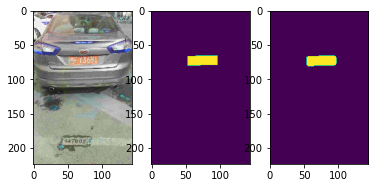

In [10]:
print(original[0].shape)
print(masks[0].shape)
print(predicted[0].shape)
print(np.unique(predicted[0]))

print(len(original))
print(len(masks))
print(len(predicted))

index = 34
plt.subplot(1, 3, 1)
plt.imshow(original[index])
plt.subplot(1, 3, 2)
plt.imshow(masks[index])
plt.subplot(1, 3, 3)
plt.imshow(predicted[index])

In [14]:
print(history.history)

{'loss': [-0.046604033559560776, -0.0001609736937098205, -0.00016808012151159346, -0.01251563336700201, -0.02358279936015606, -0.023939043283462524, -0.05989520251750946, -0.18145038187503815, -0.1971781849861145, -0.5644397735595703, -0.7489106059074402, -0.773045539855957, -0.7923354506492615, -0.806769609451294, -0.8165033459663391, -0.8218894004821777, -0.8286417126655579, -0.8392307162284851, -0.842021107673645, -0.8473657369613647], 'jacard_coef': [0.046604033559560776, 0.0001609736937098205, 0.00016808012151159346, 0.01251563336700201, 0.02358279936015606, 0.023939043283462524, 0.05989520251750946, 0.18145038187503815, 0.1971781849861145, 0.5644397735595703, 0.7489106059074402, 0.773045539855957, 0.7923354506492615, 0.806769609451294, 0.8165033459663391, 0.8218894004821777, 0.8286417126655579, 0.8392307162284851, 0.842021107673645, 0.8473657369613647], 'val_loss': [-0.0001511457667220384, -0.0001456085010431707, -0.00014335601008497179, -0.02589808590710163, -0.02620743401348591

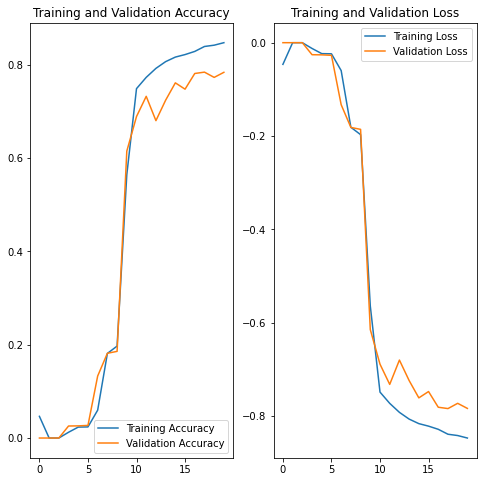

In [15]:
acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()